# Titanic Survival Prediction

**Importing required packages**


In [47]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Importing Datset**

In [48]:

train = pd.read_csv('/content/train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
test = pd.read_csv('/content/test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
test_id = test['PassengerId']

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Description**



Data Types

In [53]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Null values Present in the dataset

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Percentage of null values in data**

Percentage of null values in age column

In [59]:
(train.isna().sum().sort_values(ascending = False)/train.shape[0])*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

**Handling the missing values**

Distribution of feature having null values

<Axes: xlabel='Age', ylabel='Density'>

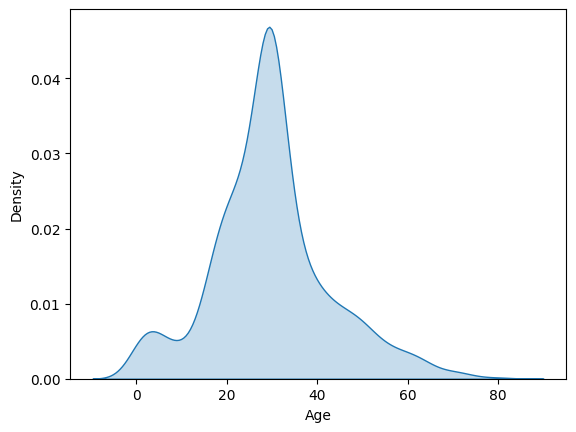

In [92]:
sns.kdeplot(train.Age,fill = True)

In [61]:
# Distribution is not skewed hence we replacing null values with mean value
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
train['Embarked'].fillna(method='bfill',inplace = True)

In [63]:
# Replacing null values by mean in fare
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

**Visualization**

Countplot of Survived or not

<Axes: xlabel='Survived', ylabel='count'>

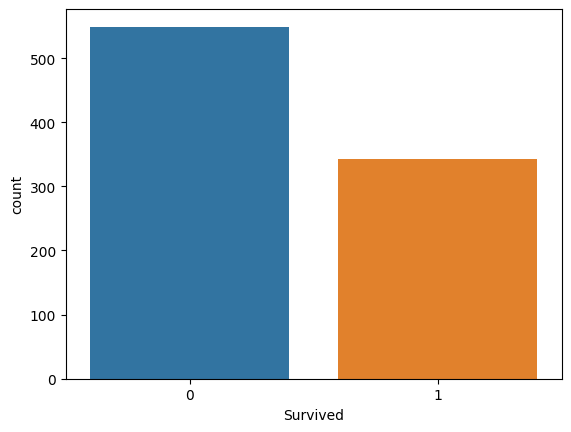

In [66]:
sns.countplot(x='Survived',data = train)

Gender distribution in survival

<Axes: xlabel='Survived', ylabel='count'>

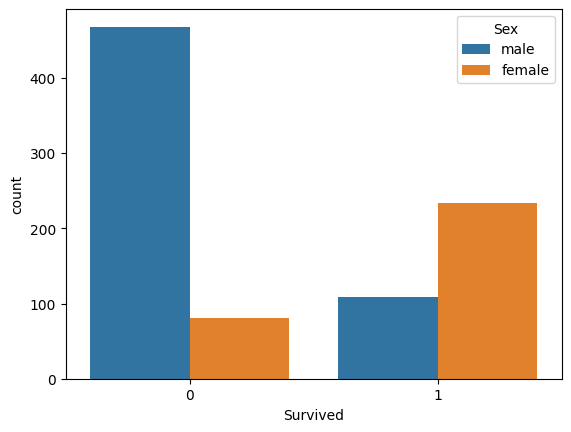

In [67]:
sns.countplot(x='Survived',data = train,hue='Sex')

**Converting the sex column in numeric values**

In [68]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [69]:
train['Gender']= pd.get_dummies(train['Sex'],drop_first=True)
test['Gender']= pd.get_dummies(test['Sex'],drop_first=True)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


**Removing unnecessary features**



The columns 'Name','Ticket','Embarked','Cabin' contains non numerical values.It seems like they are mot useful for machine learning prediction hence we drop it.

In [64]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [72]:
train.drop(['PassengerId','Name','Sex','Ticket'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Sex','Ticket'],axis=1,inplace=True)

In [73]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.25,S,1


**Splitting the dependent and independent fearture**

In [75]:
x_train = train.iloc[:,1:8].values
y_train = train.iloc[:,0].values

In [76]:
print(x_train)

[[3 22.0 1 ... 7.25 'S' 1]
 [1 38.0 1 ... 71.2833 'C' 0]
 [3 26.0 0 ... 7.925 'S' 0]
 ...
 [3 29.69911764705882 1 ... 23.45 'S' 0]
 [1 26.0 0 ... 30.0 'C' 1]
 [3 32.0 0 ... 7.75 'Q' 1]]


**Encoding of feature - Embarked**

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_train = ColumnTransformer(transformers = [('encoder', OneHotEncoder() , [5])],remainder ='passthrough')
ct_test = ColumnTransformer(transformers = [('encoder', OneHotEncoder() , [5])],remainder ='passthrough')
x_train = np.array(ct_train.fit_transform(x_train))
test = np.array(ct_test.fit_transform(test))

**Normalize the data**

In [78]:
from sklearn.preprocessing import Normalizer

In [79]:
normalizer = Normalizer()

In [80]:
normalizer.transform(x_train)

array([[0.        , 0.        , 0.04269598, ..., 0.        , 0.30954582,
        0.04269598],
       [0.01237655, 0.        , 0.        , ..., 0.        , 0.88224143,
        0.        ],
       [0.        , 0.        , 0.03654395, ..., 0.        , 0.28961078,
        0.        ],
       ...,
       [0.        , 0.        , 0.02628904, ..., 0.05257808, 0.61647799,
        0.        ],
       [0.0251657 , 0.        , 0.        , ..., 0.        , 0.75497086,
        0.0251657 ],
       [0.        , 0.03021903, 0.        , ..., 0.        , 0.2341975 ,
        0.03021903]])

**Model Training**

In [83]:
from sklearn.pipeline import make_pipeline

Applying standardization

In [84]:
from sklearn.preprocessing import StandardScaler

Classification Algorithm- Support Vector machine

In [85]:
from sklearn import svm

In [86]:
pipe = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))

In [87]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

**Prediction**

In [88]:
predict = pipe.predict(test)

In [89]:
submission = pd.DataFrame({'PassengerId':test_id , 'Survived':predict}, index=None)

In [90]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [91]:
submission.to_csv('submission.csv', index=None)